# Use FRAUD_ANALY_Template Customized Notebook Template

In [22]:
from snowflake.snowpark import Session
from snowflake.connector.pandas_tools import write_pandas

# Data Science Libs
import numpy as np
import pandas as pd

#Visualization Lib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

In [23]:
# Importing FosforML for Snowflake Data Access
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [24]:
df = 'FRAUD_DETECTION_ANALY_MASTER_TABLE'

In [25]:
sf_df = my_session.sql("select * from {}".format(df))

In [26]:
import pandas as pd
fraud_df = sf_df.to_pandas()

In [27]:
Fraud_Detection = fraud_df.copy()

In [28]:
Fraud_Detection.shape

(300000, 50)

In [29]:
Fraud_Detection.columns

Index(['CREDIT_LIMIT', 'ACCOUNT_OPENING_DATE', 'LAST_LOGIN',
       'CUSTOMER_SEGMENT', 'ACCOUNT_TYPE', 'DEVICE_USED', 'NAME', 'GENDER',
       'DOB', 'AGE', 'CUSTOMER_ID', 'AGE_GROUP', 'AGE_OF_ACCOUNT',
       'FREQUENCY_OF_TRANSACTIONS', 'CUSTOMER_LOYALTY_SCORE',
       'NUMBER_OF_REFUNDS', 'NUMBER_OF_CHARGEBACKS',
       'CREDIT_UTILIZATION_RATIO', 'CHANGE_IN_SPENDING_BEHAVIOR',
       'TRANSACTION_VELOCITY', 'CUSTOMER_LOYALTY_CATEGORY',
       'TIME_SINCE_LAST_TRANSACTION', 'TRANSACTION_ID', 'TIME',
       'TRANSACTION_AMOUNT', 'MERCHANT_RISK_SCORE',
       'DISTANCE_FROM_HOME_ADDRESS', 'DISTANCE_FROM_LAST_TRANSACTION',
       'TRANSACTION_DATE', 'TRANSACTION_TYPE', 'MERCHANT_CATEGORY',
       'PAYMENT_METHOD', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'TRANSACTION_STATUS',
       'COUNTY', 'STATE', 'CITY', 'YEAR', 'QUARTER', 'MONTH', 'ANOMALY_SCORE',
       'FRAUD_INDICATOR', 'SUSPICIOUS_FLAG', 'PREVIOUS_FRAUD_REPORTS',
       'CROSS_BORDER_TRANSACTION_INDICATOR', 'NEW_DEVICE_INDICATOR',
    

In [30]:
### changing Incident date into datetime format
Fraud_Detection['TRANSACTION_DATE']=pd.to_datetime(Fraud_Detection['TRANSACTION_DATE'],format='%Y-%m-%d')

### changing auto_year date into datetime format
Fraud_Detection['YEAR']=pd.to_datetime(Fraud_Detection['YEAR'],format='%Y')

In [35]:
### Intialize "count" column
Fraud_Detection['count']=1

# Fraud Distribution

In [42]:
groupdf_is = Fraud_Detection.groupby(by=['FRAUD_FLAG']).count()
groupdf_is.reset_index(inplace=True)
groupdf_is = groupdf_is[['FRAUD_FLAG', 'count']]
groupdf_is.head()

,FRAUD_FLAG,count
0,No,283877
1,Yes,16123


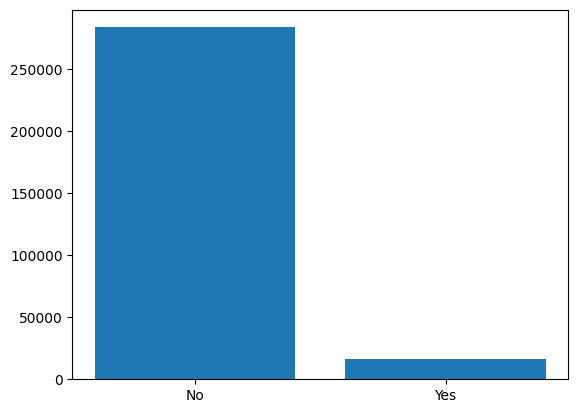

In [43]:
plt.bar(groupdf_is['FRAUD_FLAG'],groupdf_is['count'])
plt.show()

# Fraud By Gender

In [44]:
groupdf_is = Fraud_Detection.groupby(by=['GENDER', 'FRAUD_FLAG']).count()
groupdf_is.reset_index(inplace=True)
groupdf_is = groupdf_is[['GENDER', 'FRAUD_FLAG', 'count']]
groupdf_is.head()

,GENDER,FRAUD_FLAG,count
0,Female,No,141546
1,Female,Yes,8144
2,Male,No,142331
3,Male,Yes,7979


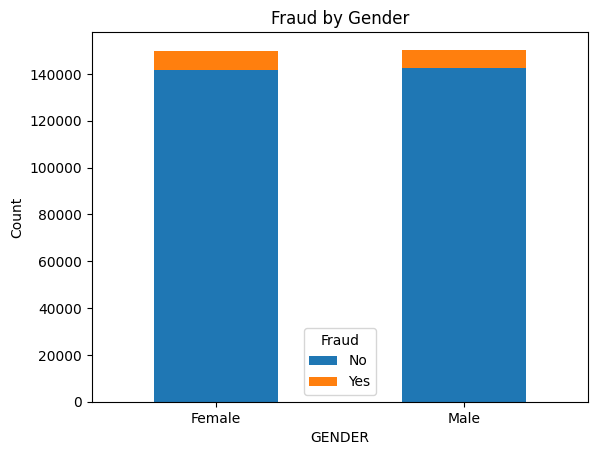

In [47]:
# Pivot the DataFrame to get the counts of fraud by gender
pivot_df = groupdf_is.pivot(index='GENDER', columns='FRAUD_FLAG', values='count')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.title('Fraud by Gender')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fraud')
plt.show()

# Fraud Against Credit Limit

In [49]:
groupdf_uu = Fraud_Detection.groupby(by=['CREDIT_LIMIT', 'FRAUD_FLAG']).count()
groupdf_uu.reset_index(inplace=True)
groupdf_uu = groupdf_uu[['CREDIT_LIMIT', 'FRAUD_FLAG', 'count']]
groupdf_uu.head(5)

,CREDIT_LIMIT,FRAUD_FLAG,count
0,5000,No,35322
1,5000,Yes,2048
2,10000,No,35442
3,10000,Yes,1997
4,15000,No,35447


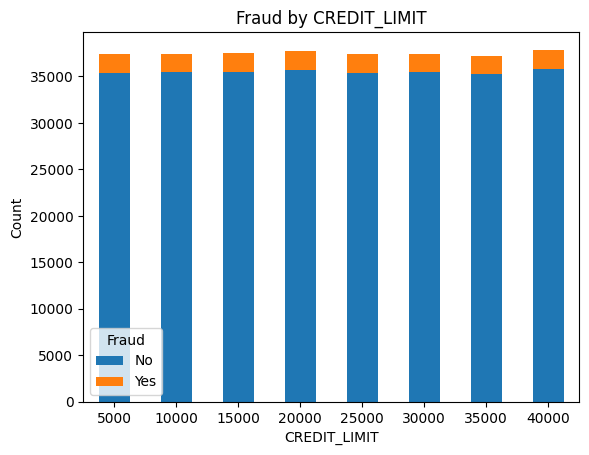

In [50]:
# Pivot the DataFrame to get the counts of fraud by gender
pivot_df = groupdf_uu.pivot(index='CREDIT_LIMIT', columns='FRAUD_FLAG', values='count')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.title('Fraud by CREDIT_LIMIT')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fraud')
plt.show()

# Fraud By Customer Loyalty

In [51]:
groupdf_el = Fraud_Detection.groupby(by=['CUSTOMER_LOYALTY_CATEGORY', 'FRAUD_FLAG']).count()
groupdf_el.reset_index(inplace=True)
groupdf_el = groupdf_el[['CUSTOMER_LOYALTY_CATEGORY', 'FRAUD_FLAG', 'count']]
groupdf_el.head()

,CUSTOMER_LOYALTY_CATEGORY,FRAUD_FLAG,count
0,High Loyalty,No,71399
1,High Loyalty,Yes,4114
2,Low Loyalty,No,72395
3,Low Loyalty,Yes,3955
4,Medium Loyalty,No,70548


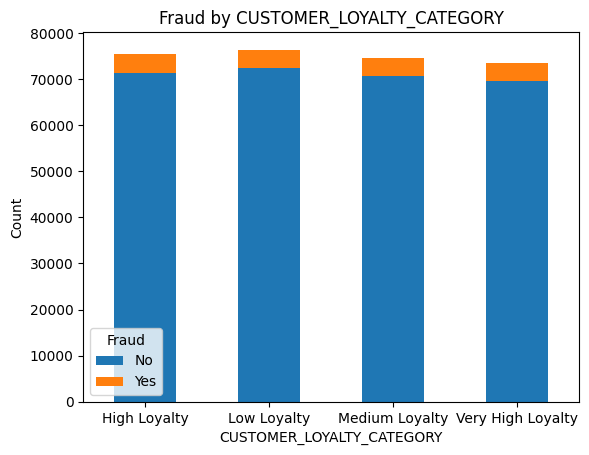

In [52]:
# Pivot the DataFrame to get the counts of fraud by gender
pivot_df = groupdf_el.pivot(index='CUSTOMER_LOYALTY_CATEGORY', columns='FRAUD_FLAG', values='count')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.title('Fraud by CUSTOMER_LOYALTY_CATEGORY')
plt.xlabel('CUSTOMER_LOYALTY_CATEGORY')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fraud')
plt.show()

# Fraud By Customer Segment

In [53]:
groupdf_ic = Fraud_Detection.groupby(by=['CUSTOMER_SEGMENT', 'FRAUD_FLAG']).count()
groupdf_ic.reset_index(inplace=True)
groupdf_ic = groupdf_ic[['CUSTOMER_SEGMENT', 'FRAUD_FLAG', 'count']]
groupdf_ic.head()

,CUSTOMER_SEGMENT,FRAUD_FLAG,count
0,Business,No,70790
1,Business,Yes,4021
2,Individual,No,71129
3,Individual,Yes,4106
4,Senior,No,70979


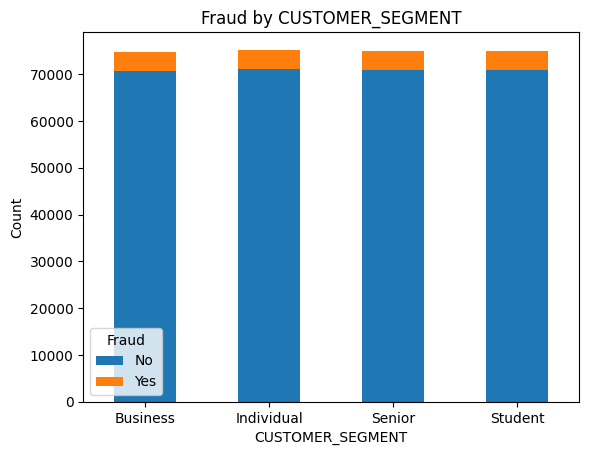

In [55]:
# Pivot the DataFrame to get the counts of fraud by gender
pivot_df = groupdf_ic.pivot(index='CUSTOMER_SEGMENT', columns='FRAUD_FLAG', values='count')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.title('Fraud by CUSTOMER_SEGMENT')
plt.xlabel('CUSTOMER_SEGMENT')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fraud')
plt.show()

# Fraud By Age Group

In [57]:
groupdf_rl = Fraud_Detection.groupby(by=['AGE_GROUP', 'FRAUD_FLAG']).count()
groupdf_rl.reset_index(inplace=True)
groupdf_rl = groupdf_rl[['AGE_GROUP', 'FRAUD_FLAG', 'count']]
groupdf_rl.head()

,AGE_GROUP,FRAUD_FLAG,count
0,Adult,No,67720
1,Adult,Yes,3830
2,Senior,No,136736
3,Senior,Yes,7804
4,Teenager,No,2650


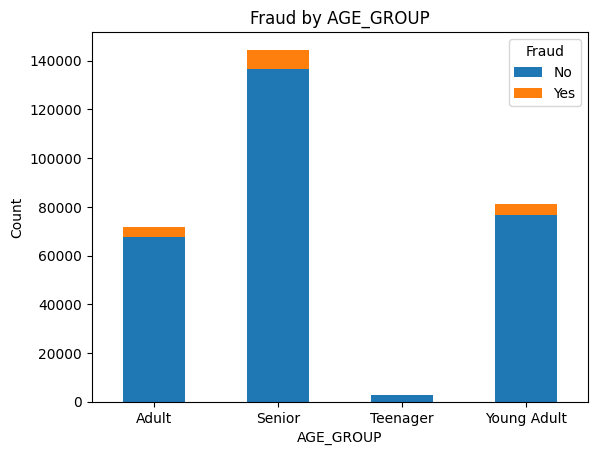

In [58]:
# Pivot the DataFrame to get the counts of fraud by gender
pivot_df = groupdf_rl.pivot(index='AGE_GROUP', columns='FRAUD_FLAG', values='count')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.title('Fraud by AGE_GROUP')
plt.xlabel('AGE_GROUP')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fraud')
plt.show()

# Fraud By Merchant Category

In [59]:
groupdf_it=Fraud_Detection.groupby(by=['MERCHANT_CATEGORY','FRAUD_FLAG']).count()
groupdf_it.reset_index(inplace=True)
groupdf_it=groupdf_it[['MERCHANT_CATEGORY','FRAUD_FLAG','count']]
groupdf_it.head()

,MERCHANT_CATEGORY,FRAUD_FLAG,count
0,Apparel,No,35700
1,Apparel,Yes,1991
2,Electronics,No,35604
3,Electronics,Yes,2012
4,Entertainment,No,35409


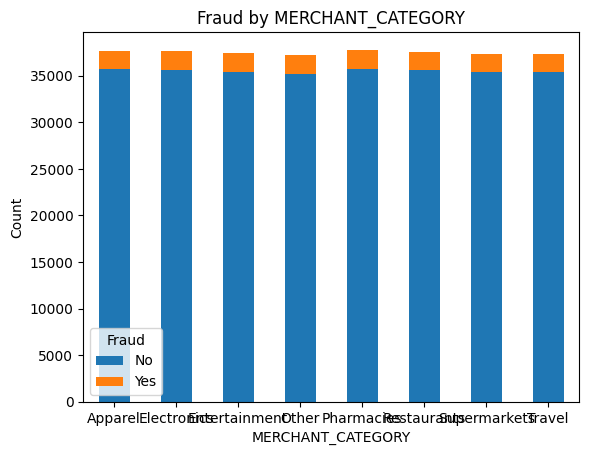

In [60]:
# Pivot the DataFrame to get the counts of fraud by gender
pivot_df = groupdf_it.pivot(index='MERCHANT_CATEGORY', columns='FRAUD_FLAG', values='count')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.title('Fraud by MERCHANT_CATEGORY')
plt.xlabel('MERCHANT_CATEGORY')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fraud')
plt.show()

# Fraud Percentage by Customer Segment

In [63]:
grp1 = Fraud_Detection.groupby(['CUSTOMER_SEGMENT'])['FRAUD_INDICATOR'].mean()
grp1 = pd.DataFrame(grp1)
grp1.reset_index(inplace=True)
grp1['FRAUD_INDICATOR'] = grp1['FRAUD_INDICATOR'].apply(lambda x: 100 * x)
grp1['FRAUD_INDICATOR'] = grp1['FRAUD_INDICATOR'].apply(lambda x: round(x, 2))
grp1['FRAUD_INDICATOR'] = grp1['FRAUD_INDICATOR'].apply(lambda x: "{}{}".format(x, '%'))
grp1.rename(columns={'FRAUD_INDICATOR': 'Fraud percentage'}, inplace=True)
grp1.head(10)

,CUSTOMER_SEGMENT,Fraud percentage
0,Business,5.37%
1,Individual,5.46%
2,Senior,5.36%
3,Student,5.3%


<BarContainer object of 4 artists>

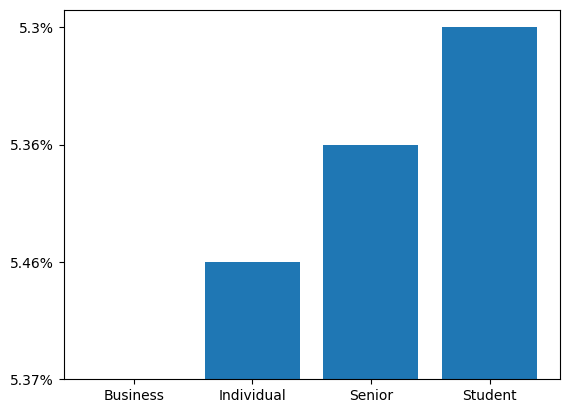

In [67]:
plt.bar(grp1['CUSTOMER_SEGMENT'],grp1['Fraud percentage'])

# Fraud Percentage by Device Used

In [68]:
grp2=Fraud_Detection.groupby(['DEVICE_USED'])['FRAUD_INDICATOR'].mean()
grp2=pd.DataFrame(grp2)
grp2.reset_index(inplace=True)
grp2['FRAUD_INDICATOR']=grp2['FRAUD_INDICATOR'].apply(lambda x: 100*x)
grp2['FRAUD_INDICATOR']=grp2['FRAUD_INDICATOR'].apply(lambda x: round(x,2))
grp2['FRAUD_INDICATOR'] = grp2['FRAUD_INDICATOR'].apply(lambda x: "{}{}".format(x,'%'))
grp2.rename(columns={'FRAUD_INDICATOR':'Fraud percentage'},inplace=True)
grp2.head()

,DEVICE_USED,Fraud percentage
0,Desktop,5.4%
1,Laptop,5.48%
2,Mobile,5.36%
3,Other,5.18%
4,Tablet,5.44%


<BarContainer object of 5 artists>

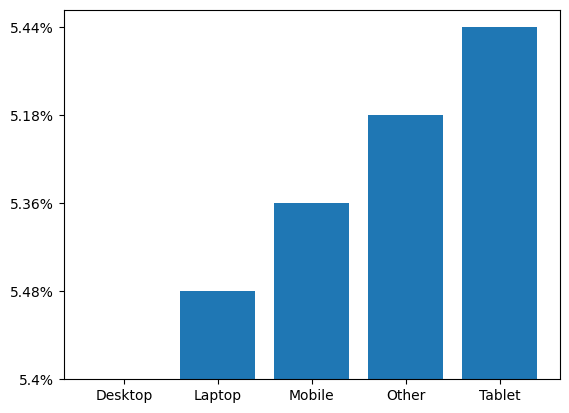

In [70]:
plt.bar(grp2['DEVICE_USED'],grp2['Fraud percentage'])

# Gender Customer Segmentation Correlation

In [71]:
claim_gender_edu=pd.pivot_table(data=Fraud_Detection,index='GENDER',columns='CUSTOMER_SEGMENT',values='FRAUD_INDICATOR')
claim_gender_edu

CUSTOMER_SEGMENT,Business,Individual,Senior,Student
GENDER,,,,
Female,0.053945,0.056077,0.053518,0.054072
Male,0.053554,0.053075,0.053708,0.051994


Text(0.5, 1.0, 'Fraud correlaton between betwwen Gender and Customer Segmnet')

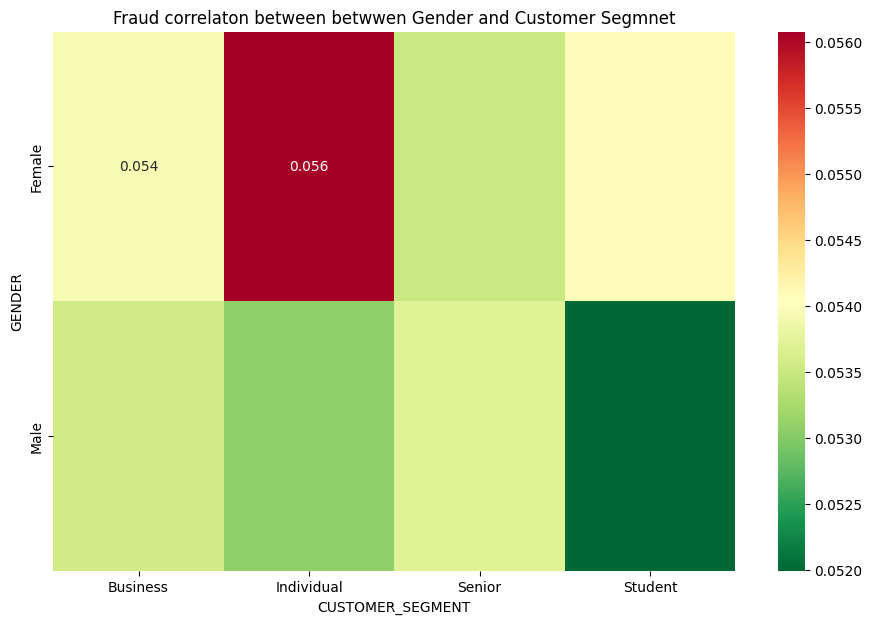

In [72]:
plt.figure(figsize=[11,7])
sns.heatmap(claim_gender_edu,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between betwwen Gender and Customer Segmnet")

In [73]:
claim_gender_Acctype = pd.pivot_table(data=Fraud_Detection, index='GENDER', columns='ACCOUNT_TYPE', values='FRAUD_INDICATOR')
claim_gender_Acctype

ACCOUNT_TYPE,Business Account,Checking Account,Investment Account,Savings Account
GENDER,,,,
Female,0.053165,0.053649,0.054268,0.056547
Male,0.054607,0.051004,0.052333,0.054381


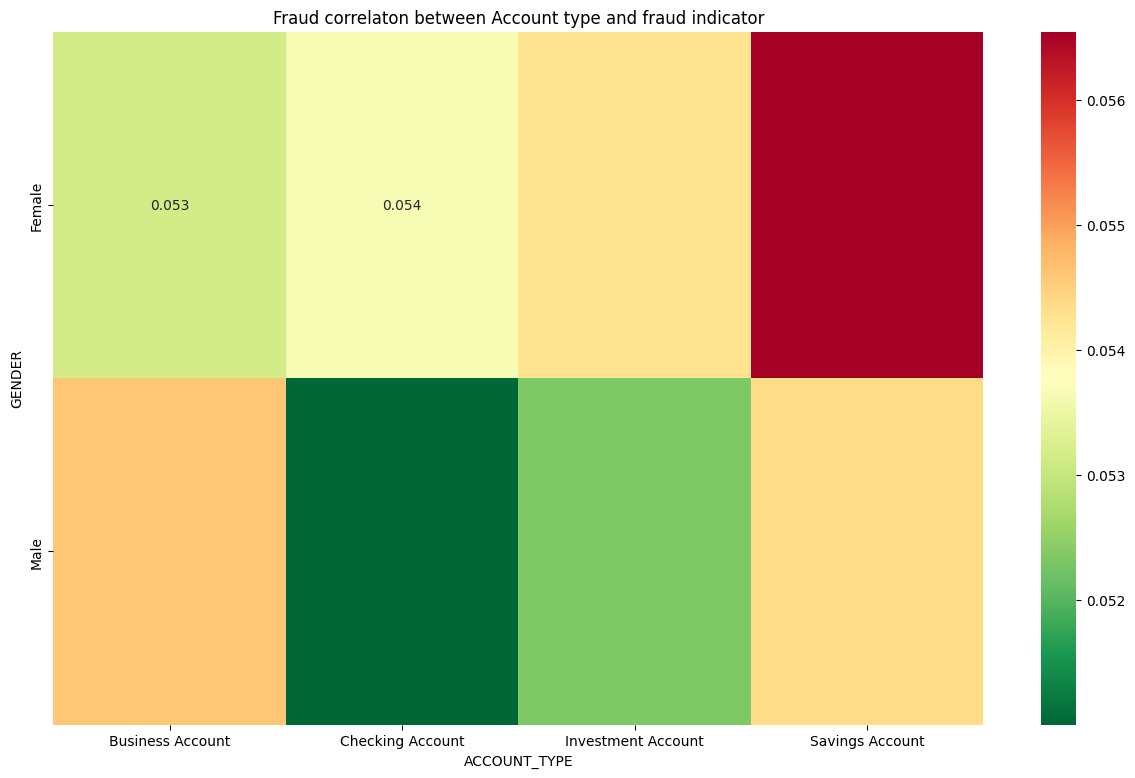

In [74]:
plt.figure(figsize=[15,9])
sns.heatmap(claim_gender_Acctype,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between Account type and fraud indicator")
plt.show()